Sry about the mess, this was mostly exploration


In [1]:
# if getwd is inside src, go up one level
if (grepl("src", getwd())) {
  setwd("..")
  jetpack::load()
}


library(here)
library(tidyverse)
library(conflicted)
# library(easystats)

exoplanets <- read_csv(here("data", "exoplanet_catalog_080325.csv"))
exoplanets

here() starts at C:/Users/plancha/exoplanets
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 7418 Columns: 98
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): name, planet_status, publication, detection_type, mass_measuremen...
dbl  (83): mass, mass_error_min, mass_error_max, mass_sini, mass_sini_error_...
lgl   (2): hot_point_lon, star_magnetic_field
date  (1): updated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the 

Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


# A tibble: 7,418 × 98
   name      planet_status  mass mass_error_min mass_error_max mass_sini
   <chr>     <chr>         <dbl>          <dbl>          <dbl>     <dbl>
 1 109 Psc b Confirmed      5.74          0.289          1.01      6.38 
 2 112 Psc b Confirmed     NA             0.005          0.004     0.033
 3 112 Psc c Confirmed      9.87          1.78           3.19     NA    
 4 11 Com Ab Confirmed     NA             1.53           1.53     16.1  
 5 11 UMi b  Confirmed     NA             1.1            1.1      11.1  
 6 14 And Ab Confirmed     NA             0.23           0.23      4.68 
 7 14 Her b  Confirmed      8.5           0.8            1         4.95 
 8 14 Her c  Confirmed      7.1           0.6            1         7.12 
 9 16 Cyg Bb Confirmed     NA             0.08           0.08      1.64 
10 18 Del Ab Confirmed     NA             0.36           0.36     10.3  
# ℹ 7,408 more rows
# ℹ 92 more variables: mass_sini_error_min <dbl>, mass_sini_error_max <dbl>,
#   

In [2]:
library(skimr)
skim(exoplanets)

Warning message:
There was 1 warning in `dplyr::summarize()`.
ℹ In argument: `dplyr::across(tidyselect::any_of(variable_names),
  mangled_skimmers$funs)`.
ℹ In group 0: .
Caused by warning:
! There was 1 warning in `dplyr::summarize()`.
ℹ In argument: `dplyr::across(tidyselect::any_of(variable_names),
  mangled_skimmers$funs)`.
Caused by warning in `inline_hist()`:
! Variable contains Inf or -Inf value(s) that were converted to NA. 


── Data Summary ────────────────────────
                           Values    
Name                       exoplanets
Number of rows             7418      
Number of columns          98        
_______________________              
Column type frequency:               
  character                12        
  Date                     1         
  logical                  2         
  numeric                  83        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
   skim_variable           n_missing complete_rate min max empty n_unique
 1 name                            0        1        5  31     0     7418
 2 planet_status                   0        1        9   9     0        1
 3 publication                     0        1       22  38     0        4
 4 detection_type                  0        1        3  36     0       32
 5 mass_measurement_type        4320        0.418  

In [3]:
library(tidymodels)
glimpse(exoplanets)

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.1.1     
Rows: 7,418
Columns: 98
$ name                       <chr> "109 Psc b", "112 Psc b", "112 Psc c", "11 …
$ planet_status              <chr> "Confirmed", "Confirmed", "Confirmed", "Con…
$ mass                       <dbl> 5.743, NA, 9.866, NA, NA, NA, 8.500, 7.100,…
$ mass_error_min             <dbl> 0.28900, 0.00500, 1.78100, 1.53491, 1.10000…
$ mass_error_max             <dbl> 1.01100, 0.00400, 3.19000, 1.53491, 1.10000…
$ mass_sini                  <dbl> 6.3830, 0.0330, NA, 16.1284, 11.0873, 4.684…
$ mass_sini_error_min        <dbl> 0.07800, 0.00500, NA, 1.53491, 1.10000, 0.2…
$ mass_sini_error_max        <dbl> 0.07800, 0.00400, NA, 1.53491, 1.10000, 0.2…

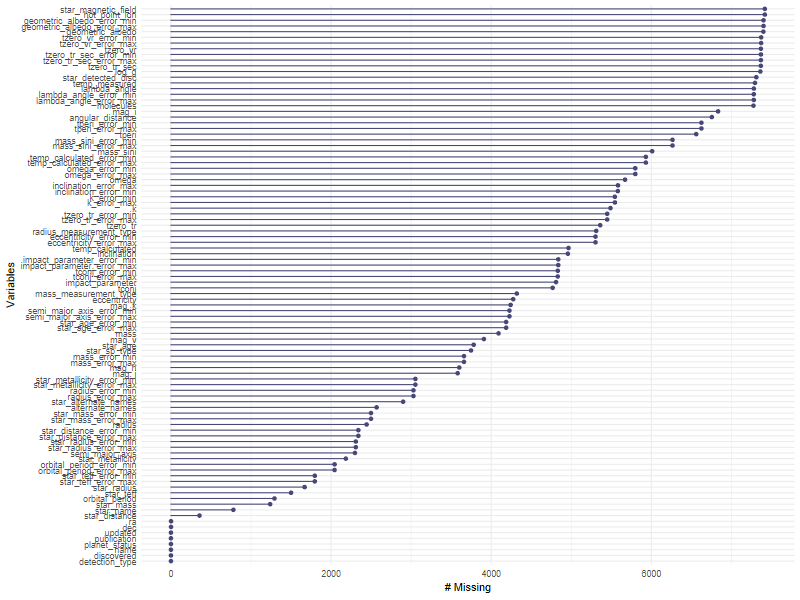

In [4]:
library(naniar)
gg_miss_var(exoplanets)

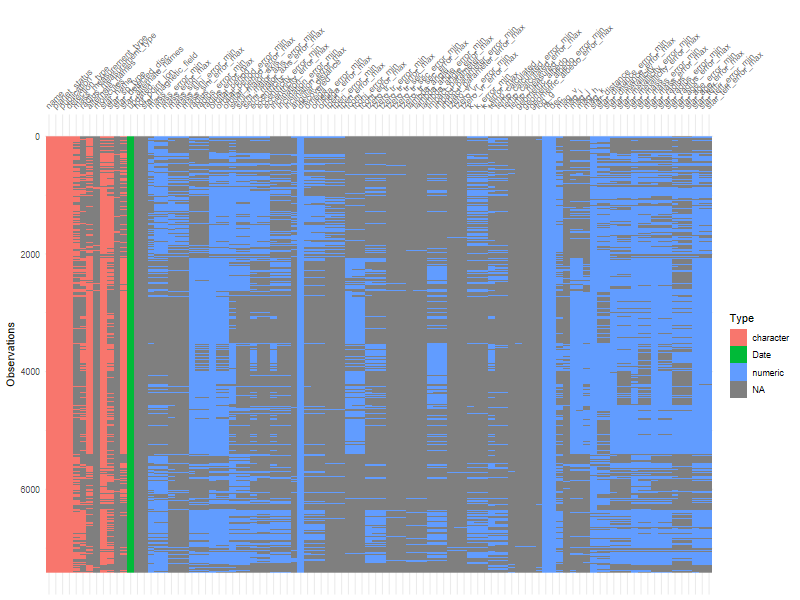

In [5]:
library(visdat)
vis_dat(exoplanets)

In [6]:
names(exoplanets)

 [1] "name"                       "planet_status"             
 [3] "mass"                       "mass_error_min"            
 [5] "mass_error_max"             "mass_sini"                 
 [7] "mass_sini_error_min"        "mass_sini_error_max"       
 [9] "radius"                     "radius_error_min"          
[11] "radius_error_max"           "orbital_period"            
[13] "orbital_period_error_min"   "orbital_period_error_max"  
[15] "semi_major_axis"            "semi_major_axis_error_min" 
[17] "semi_major_axis_error_max"  "eccentricity"              
[19] "eccentricity_error_min"     "eccentricity_error_max"    
[21] "inclination"                "inclination_error_min"     
[23] "inclination_error_max"      "angular_distance"          
[25] "discovered"                 "updated"                   
[27] "omega"                      "omega_error_min"           
[29] "omega_error_max"            "tperi"                     
[31] "tperi_error_min"            "tperi_error_max"    

In [7]:
library(janitor)
exoplanets %>% tabyl(planet_status)

 planet_status    n percent
     Confirmed 7418       1

In [8]:
conflicts_prefer(dplyr::filter)
exoplanets %>% 
  filter(name %>% str_like("%TOI-784%"))

[conflicted] Will prefer dplyr::filter over any other package.


# A tibble: 2 × 98
  name      planet_status   mass mass_error_min mass_error_max mass_sini
  <chr>     <chr>          <dbl>          <dbl>          <dbl>     <dbl>
1 TOI-784 b Confirmed     0.0304         0.0025         0.0025   NA     
2 TOI-784 c Confirmed     0.0688         0.0291       Inf         0.0688
# ℹ 92 more variables: mass_sini_error_min <dbl>, mass_sini_error_max <dbl>,
#   radius <dbl>, radius_error_min <dbl>, radius_error_max <dbl>,
#   orbital_period <dbl>, orbital_period_error_min <dbl>,
#   orbital_period_error_max <dbl>, semi_major_axis <dbl>,
#   semi_major_axis_error_min <dbl>, semi_major_axis_error_max <dbl>,
#   eccentricity <dbl>, eccentricity_error_min <dbl>,
#   eccentricity_error_max <dbl>, inclination <dbl>, …

In [9]:
conflicts_prefer(dplyr::filter)
exoplanets %>% 
  filter(discovered == 2023)

[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::filter over any other package.


# A tibble: 267 × 98
   name             planet_status  mass mass_error_min mass_error_max mass_sini
   <chr>            <chr>         <dbl>          <dbl>          <dbl>     <dbl>
 1 75 Cet Ac        Confirmed     NA             0.09           0.09     0.91  
 2 AF Lep b         Confirmed      3.75          0.5            0.5     NA     
 3 BD-21 397 c      Confirmed      4.8           0.6            0.6     NA     
 4 bet And b        Confirmed     NA             2.17           2.05    28.3   
 5 BW Scl b         Confirmed     51             6              6       NA     
 6 CWISE J0506+0738 Confirmed      7             2              2       NA     
 7 del Vir b        Confirmed     NA             2.7            2.3     15.8   
 8 DMPP-4 b         Confirmed     NA             0.005          0.005    0.0365
 9 G 165-52 b       Confirmed     54.4          11.4           11.2     NA     
10 Gaia22dkv b      Confirmed      0.5           0.05           0.05    NA     
# ℹ 257 more rows
#

Warning message:
Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 


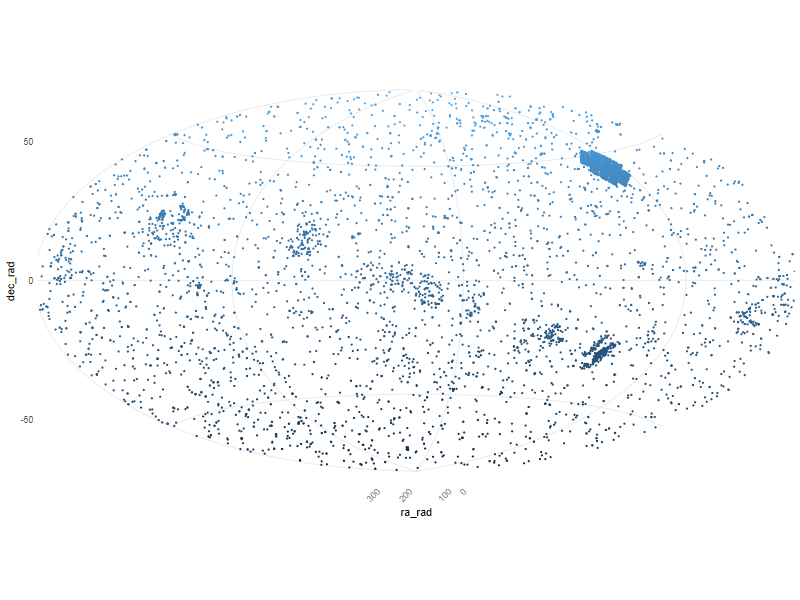

In [10]:
exoplanets %>%
  mutate(
    ra_rad = ra,  # Convert RA to radians
    dec_rad = dec  # Convert Dec to radians
  ) %>% 
  ggplot(aes(x = ra_rad, y = dec_rad, color = dec)) +
  geom_point(size = 0.4) +
  coord_map("aitoff") +  # Apply Aitoff projection
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"  # Optionally remove legend
  )

In [11]:
library(dplyr)
library(plotly)
conflicts_prefer(plotly::layout)
# Create a new column to distinguish Kepler exoplanets
exoplanets_3d <- exoplanets %>%
  mutate(
    ra_rad = ra * pi / 180,   # Convert RA from degrees to radians
    dec_rad = dec * pi / 180, # Convert Dec from degrees to radians
    x = cos(dec_rad) * cos(ra_rad), # Convert to Cartesian coordinates
    y = cos(dec_rad) * sin(ra_rad),
    z = sin(dec_rad),
    color = case_when(  # Create a column for red when kepler, blue otherwise
      str_detect(paste(name, alternate_names), regex("kepler|koi", ignore_case = TRUE)) ~ "Kepler",
      # if it's free floating (star_name is NA)
      star_name %>% is.na() ~ "Free Floating",
      TRUE ~ "Other"
    ),
    hover_text = paste("Name: ", name) # Create custom hover text with the name of the exoplanet
  )

# Define steps for opacity slider
steps <- list(
  list(args = list("marker.opacity", 0.0), label = "0.0", method = "restyle"),
  list(args = list("marker.opacity", 0.1), label = "0.1", method = "restyle"),
  list(args = list("marker.opacity", 0.2), label = "0.2", method = "restyle"),
  list(args = list("marker.opacity", 0.3), label = "0.3", method = "restyle"),
  list(args = list("marker.opacity", 0.4), label = "0.4", method = "restyle"),
  list(args = list("marker.opacity", 0.5), label = "0.5", method = "restyle"),
  list(args = list("marker.opacity", 0.6), label = "0.6", method = "restyle"),
  list(args = list("marker.opacity", 0.7), label = "0.7", method = "restyle"),
  list(args = list("marker.opacity", 0.8), label = "0.8", method = "restyle"),
  list(args = list("marker.opacity", 0.9), label = "0.9", method = "restyle"),
  list(args = list("marker.opacity", 1.0), label = "1.0", method = "restyle")
)

# Create an interactive 3D scatter plot with plotly
plot_ly(
  data = exoplanets_3d,
  x = ~x,
  y = ~y,
  z = ~z,
  color = ~color,  # Use the kepler_highlight column for color mapping
  colors = c("Other" = "red", "Kepler" = "blue", "Free Floating" = "green"),
  text = ~hover_text, # Show the name of the exoplanet on hover
  type = "scatter3d",
  mode = "markers",
  marker = list(size = 1, opacity = 0.7), # Default opacity
  showlegend = TRUE
) %>%
  layout(
    title = "3D Sky Map of Exoplanets (Kepler Highlighted)",
    scene = list(
      xaxis = list(title = "X"),
      yaxis = list(title = "Y"),
      zaxis = list(title = "Z")
    ),
    sliders = list(
      list(
        active = 1,  # Set the default opacity value to 1.0 (fully opaque)
        currentvalue = list(
          prefix = "Opacity: ",
          font = list(size = 15)
        ),
        pad = list(t = 60),
        steps = steps  # Use the steps defined earlier for the opacity slider
      )
    )
  )


[conflicted] Will prefer plotly::layout over any other package.


<plotly HTML widget HTML Widget>

Warning message:
Ignoring 1 observations 


Warning messages:
1: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 
2: Removed 357 rows containing missing values or values outside the scale range
(`geom_point()`). 


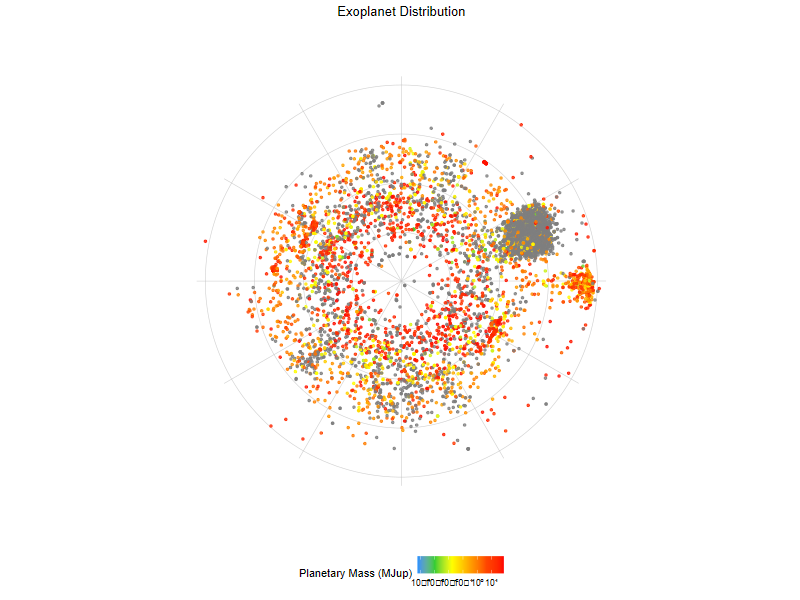

In [12]:

# Assuming your data is loaded as 'exoplanets'
# Convert RA to degrees (if it's in hours:minutes:seconds format)
# If RA is already in degrees, skip this step
exoplanets %>%
  mutate(
    ra_deg = ra,  # Convert RA from hours to degrees (if needed)
    # Convert to polar coordinates for plotting
    # RA is mapped to theta (0-360 degrees)
    theta = ra_deg
  ) %>% 
ggplot(aes(x = theta, y = star_distance, color = mass)) +
  # Use coord_polar for circular plot
  coord_polar(start = 0, direction = -1) + # Start at 0 degrees, clockwise direction
  # Add concentric circles for distance reference
  geom_hline(yintercept = c(10, 100, 1000, 10000), 
             color = "gray", linetype = "solid", size = 0.3, alpha = 0.7) +
  # Add radial lines for angle reference
  geom_vline(xintercept = seq(0, 330, by = 30), 
             color = "gray", linetype = "solid", size = 0.3, alpha = 0.7) +
  # Plot the exoplanets
  geom_point(alpha = 0.8, size = 1) +
  # Use log scale for distance
  scale_y_log10(
    breaks = c(10, 100, 1000, 10000),
    labels = c("10 pc", "100 pc", "1000 pc", "10000 pc"),
    limits = c(1, 15000)
  ) +
  # Use log scale for mass colors
  scale_color_gradientn(
    colors = c("#1E90FF", "#32CD32", "#FFFF00", "#FFA500", "#FF4500", "#FF0000"),
    trans = "log10",
    breaks = c(0.0001, 0.001, 0.01, 0.1, 1, 10),
    labels = c("10⁻⁴", "10⁻³", "10⁻²", "10⁻¹", "10⁰", "10¹"),
    name = "Planetary Mass (MJup)"
  ) +
  # Remove grid and axis elements
  theme_minimal() +
  theme(
    axis.title = element_blank(),
    axis.text.y = element_blank(),
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    legend.position = "bottom",
    legend.box = "horizontal",
    plot.title = element_text(hjust = 0.5)
  ) +
  ggtitle("Exoplanet Distribution")

In [13]:
library(shiny)
library(plotly)
library(dplyr)
library(stringr)

# Assuming 'exoplanets' dataset is available
# Create a new column to distinguish Kepler exoplanets
exoplanets_3d <- exoplanets %>%
  mutate(
    ra_rad = ra * pi / 180,   # Convert RA from degrees to radians
    dec_rad = dec * pi / 180, # Convert Dec from degrees to radians
    x = cos(dec_rad) * cos(ra_rad), # Convert to Cartesian coordinates
    y = cos(dec_rad) * sin(ra_rad),
    z = sin(dec_rad),
    color = case_when(  # Create a column for red when kepler, blue otherwise
      str_detect(paste(name, alternate_names), regex("kepler|koi", ignore_case = TRUE)) ~ "Kepler",
      # if it's free floating (star_name is NA)
      star_name %>% is.na() ~ "Free Floating",
      TRUE ~ "Other"
    ),
    hover_text = paste("Name: ", name), # Create custom hover text with the name of the exoplanet
    scaled_x = x * (1 / star_distance),  # Adjust x coordinate by star distance (closer = closer to center)
    scaled_y = y * (1 / star_distance),  # Adjust y coordinate similarly
    scaled_z = z * (1 / star_distance)   # Adjust z coordinate similarly
  )

# Define steps for opacity slider
steps <- list(
  list(args = list("marker.opacity", 0.0), label = "0.0", method = "restyle"),
  list(args = list("marker.opacity", 0.1), label = "0.1", method = "restyle"),
  list(args = list("marker.opacity", 0.2), label = "0.2", method = "restyle"),
  list(args = list("marker.opacity", 0.3), label = "0.3", method = "restyle"),
  list(args = list("marker.opacity", 0.4), label = "0.4", method = "restyle"),
  list(args = list("marker.opacity", 0.5), label = "0.5", method = "restyle"),
  list(args = list("marker.opacity", 0.6), label = "0.6", method = "restyle"),
  list(args = list("marker.opacity", 0.7), label = "0.7", method = "restyle"),
  list(args = list("marker.opacity", 0.8), label = "0.8", method = "restyle"),
  list(args = list("marker.opacity", 0.9), label = "0.9", method = "restyle"),
  list(args = list("marker.opacity", 1.0), label = "1.0", method = "restyle")
)

# Define UI for the Shiny app
ui <- fluidPage(
  # Application title
  titlePanel("3D Sky Map of Exoplanets (Kepler Highlighted)"),
  
  # Sidebar layout (can remain empty since the slider is in Plotly)
  sidebarLayout(
    sidebarPanel(
      # Empty sidebar panel (since no Shiny slider is needed)
    ),
    
    mainPanel(
      # Plotly output for displaying the plot
      plotlyOutput("plot", height = "800px")  # Plot height set to 800px
    )
  )
)

# Define server logic for the Shiny app
server <- function(input, output, session) {
  
  # Create the Plotly figure to be rendered
  output$plot <- renderPlotly({
    fig <- plot_ly(
      data = exoplanets_3d,
      x = ~scaled_x,
      y = ~scaled_y,
      z = ~scaled_z,
      color = ~color,  # Use the kepler_highlight column for color mapping
      colors = c("Other" = "red", "Kepler" = "blue", "Free Floating" = "green"),
      text = ~hover_text, # Show the name of the exoplanet on hover
      type = "scatter3d",
      mode = "markers",
      marker = list(size = 2, opacity = 0.7), # Default opacity
      showlegend = TRUE
    )
    
    # Add the opacity slider directly inside Plotly layout
    fig <- fig %>% layout(
      title = "3D Sky Map of Exoplanets (Kepler Highlighted)",
      scene = list(
        xaxis = list(title = "X"),
        yaxis = list(title = "Y"),
        zaxis = list(title = "Z")
      ),
      sliders = list(
        list(
          active = 1,  # Set the default opacity value to 1.0 (fully opaque)
          currentvalue = list(
            prefix = "Opacity: ",
            font = list(size = 15)
          ),
          pad = list(t = 60),
          steps = steps  # Use the steps defined earlier for the opacity slider
        )
      ),
      height = 800  # Set the height of the plot to 800px
    )
    
    fig
  })
}

if (F) {
  # Run the application
  shinyApp(ui = ui, server = server)
}

In [14]:
# check how many are missing
exoplanets %>% 
  select(ra, dec, angular_distance) %>% 
  mutate(ra = ra %>% is.na(), dec = dec %>% is.na(), angular_distance = angular_distance %>% is.na()) %>%
  summarise_all(mean) %>%
  gather(key="column", value="percentage")

# A tibble: 3 × 2
  column           percentage
  <chr>                 <dbl>
1 ra                 0.000135
2 dec                0.000135
3 angular_distance   0.911   

In [15]:
# check which ones dont have ra
exoplanets %>% 
  filter(ra %>% is.na())

# A tibble: 1 × 98
  name               planet_status  mass mass_error_min mass_error_max mass_sini
  <chr>              <chr>         <dbl>          <dbl>          <dbl>     <dbl>
1 1RXS J131752.0-50… Confirmed      27.1            4.3            4.3        NA
# ℹ 92 more variables: mass_sini_error_min <dbl>, mass_sini_error_max <dbl>,
#   radius <dbl>, radius_error_min <dbl>, radius_error_max <dbl>,
#   orbital_period <dbl>, orbital_period_error_min <dbl>,
#   orbital_period_error_max <dbl>, semi_major_axis <dbl>,
#   semi_major_axis_error_min <dbl>, semi_major_axis_error_max <dbl>,
#   eccentricity <dbl>, eccentricity_error_min <dbl>,
#   eccentricity_error_max <dbl>, inclination <dbl>, …

In [16]:
# check out alternate names
exoplanets %>% 
  select(name, alternate_names) %>% 
  filter(alternate_names %>% str_length() > 0)


In [17]:
exoplanets %>% 
  tabyl(publication)

                            publication    n     percent
 Announced on a professional conference   55 0.007414397
                 Announced on a website 2357 0.317740631
          Published in a refereed paper 4873 0.656915611
    Submitted to a professional journal  133 0.017929361

In [18]:
# remove any column with error in the name
exoplanets_r <- exoplanets %>% 
  select(-contains("error")) %>% 
  select(-planet_status, -publication)
exoplanets_r %>% names

 [1] "name"                    "mass"                   
 [3] "mass_sini"               "radius"                 
 [5] "orbital_period"          "semi_major_axis"        
 [7] "eccentricity"            "inclination"            
 [9] "angular_distance"        "discovered"             
[11] "updated"                 "omega"                  
[13] "tperi"                   "tconj"                  
[15] "tzero_tr"                "tzero_tr_sec"           
[17] "lambda_angle"            "impact_parameter"       
[19] "tzero_vr"                "k"                      
[21] "temp_calculated"         "temp_measured"          
[23] "hot_point_lon"           "geometric_albedo"       
[25] "log_g"                   "detection_type"         
[27] "mass_measurement_type"   "radius_measurement_type"
[29] "alternate_names"         "molecules"              
[31] "star_name"               "ra"                     
[33] "dec"                     "mag_v"                  
[35] "mag_i"                   

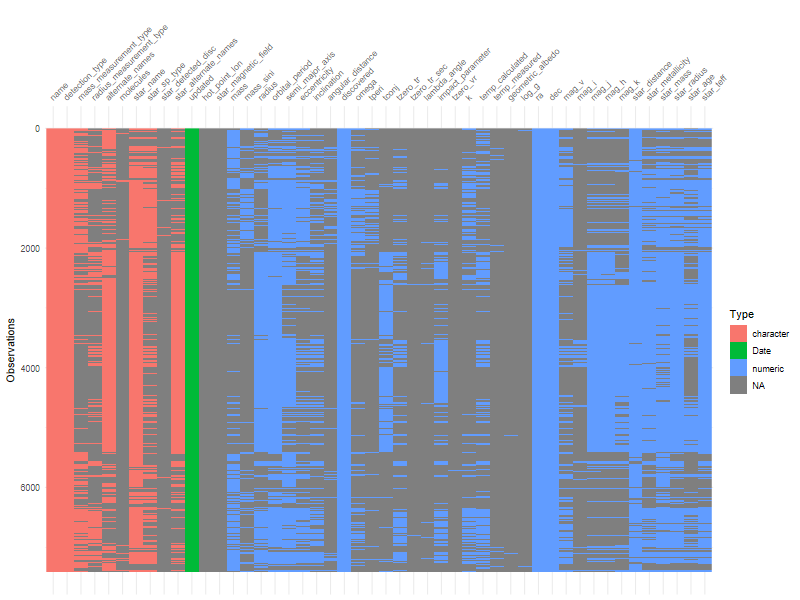

In [19]:
library(visdat)
vis_dat(exoplanets_r)

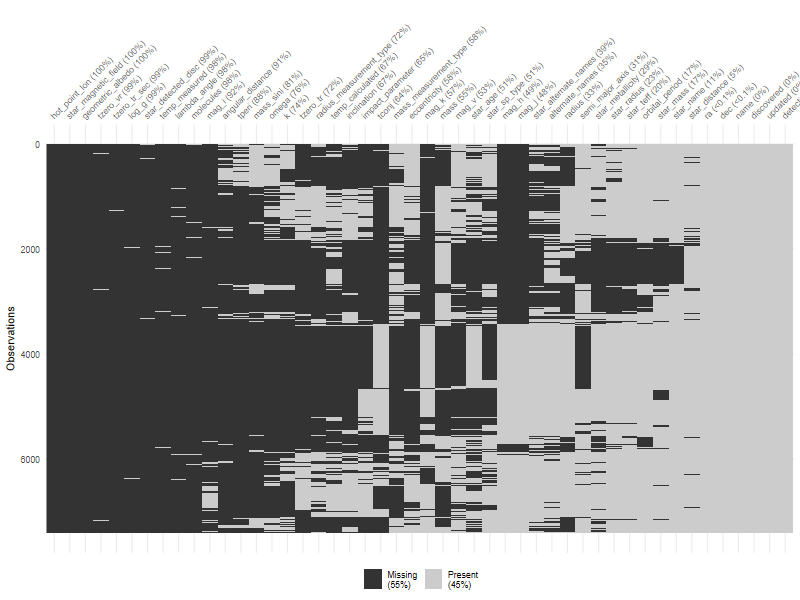

In [20]:
vis_miss(exoplanets_r, sort_miss = T, cluster = T)

# detection type

In [21]:
exoplanets %>% 
  tabyl("detection_type") %>% 
  arrange(-n)

                       detection_type    n      percent
                      Primary Transit 4509 0.6078457805
                      Radial Velocity 1145 0.1543542734
                              Imaging  922 0.1242922621
                         Microlensing  313 0.0421946616
                               Timing  160 0.0215691561
          Radial Velocity, Astrometry   99 0.0133459153
                  Imaging, Astrometry   49 0.0066055541
                           Astrometry   46 0.0062011324
                       Imaging, Other   46 0.0062011324
                                Other   42 0.0056619035
                                  TTV   32 0.0043138312
                    Timing, Kinematic   10 0.0013480723
     Primary Transit, Radial Velocity    7 0.0009436506
     Radial Velocity, Primary Transit    7 0.0009436506
                        Timing, Other    6 0.0008088434
          Astrometry, Radial Velocity    3 0.0004044217
            Imaging, Other, Kinematic    3 0.000

In [22]:
library(fastDummies)
exoplanets_rd <- exoplanets_r %>% 
  dummy_cols(select_columns = "detection_type", split = ", ")
exoplanets_rd %>% select(starts_with("detection_type")) %>% 
  unique

# A tibble: 32 × 10
   detection_type                  detection_type_Astro…¹ detection_type_Imaging
   <chr>                                            <int>                  <int>
 1 Radial Velocity, Astrometry                          1                      0
 2 Radial Velocity                                      0                      0
 3 Imaging                                              0                      1
 4 Imaging, Astrometry                                  1                      1
 5 Primary Transit                                      0                      0
 6 Primary Transit, Astrometry                          1                      0
 7 Astrometry                                           1                      0
 8 Timing                                               0                      0
 9 Timing, Kinematic                                    0                      0
10 Radial Velocity, Primary Trans…                      0                      0
# ℹ 22 m

In [23]:
exoplanets_rd %>% 
  select(starts_with("detection_type")) %>% 
  gather(key="detection_type", value="value") %>% 
  filter(value == 1) %>% 
  group_by(detection_type) %>% 
  summarise(n = n(), percentage = n()*100 / nrow(exoplanets_rd)) %>% 
  arrange(-n)

# A tibble: 9 × 3
  detection_type                     n percentage
  <chr>                          <int>      <dbl>
1 detection_type_Primary Transit  4528     61.0  
2 detection_type_Radial Velocity  1266     17.1  
3 detection_type_Imaging          1030     13.9  
4 detection_type_Microlensing      313      4.22 
5 detection_type_Astrometry        202      2.72 
6 detection_type_Timing            178      2.40 
7 detection_type_Other             101      1.36 
8 detection_type_TTV                34      0.458
9 detection_type_Kinematic          19      0.256

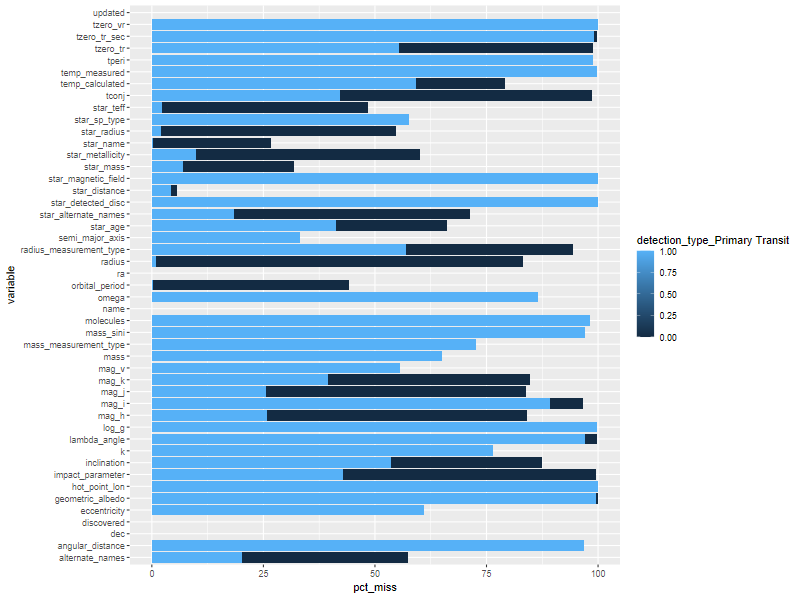

In [24]:
library(naniar)
exoplanets_rd %>%
  group_by(`detection_type_Primary Transit`) %>% 
  miss_var_summary() %>% 
  arrange(variable) %>% 
  filter(variable %>% str_detect("detection_type", negate = T)) %>% 
  ggplot(aes(x = variable, y = pct_miss, fill = `detection_type_Primary Transit`)) +
  geom_col(position="dodge") +
  coord_flip() 

In [25]:
if (F){
library(misty)
exoplanets_rd %>% 
  select(tzero_vr, tzero_tr_sec, tzero_tr) %>% 
  na.test(data = exoplanets_rd)
} # didnt work for some reason

In [26]:
library(shiny)
library(dplyr)
library(plotly)
library(naniar)  # Assuming miss_var_summary() is from naniar

# Sample UI
ui <- fluidPage(
  titlePanel("Missing Data by Detection Type"),
  
  sidebarLayout(
    sidebarPanel(
      selectInput("group_var", "Select Detection Type:", 
                  choices = names(exoplanets_rd)[grepl("^detection_type_", names(exoplanets_rd))])
    ),
    
    mainPanel(
      plotlyOutput("missing_plot", height = "700px")  # Increased height
    )
  )
)

# Server function
server <- function(input, output) {
  output$missing_plot <- renderPlotly({
    exoplanets_rd %>%
      # transform vars into bool
      mutate(across(starts_with("detection_type"), ~ .x %>% as.logical())) %>%
      group_by(.data[[input$group_var]]) %>%
      miss_var_summary() %>%
      arrange(variable) %>%
      filter(!str_detect(variable, "detection_type")) %>%
      plot_ly(y = ~variable, x = ~pct_miss, color = ~.data[[input$group_var]], type = "bar") %>%
      layout(barmode = "group", height = 700)  # Increased plot height
  })
}
# Run the app
if (F) {
  shinyApp(ui = ui, server = server)
}

In [27]:
# filter by the kepler
exoplanets %>% 
  filter(paste(name, alternate_names) %>% str_like("%Kepler%")) %>% 
  tabyl("detection_type")

                   detection_type    n      percent
                            Other    6 0.0021543986
                  Primary Transit 2722 0.9773788151
             Primary Transit, TTV    2 0.0007181329
                  Radial Velocity   26 0.0093357271
 Radial Velocity, Primary Transit    1 0.0003590664
                              TTV   23 0.0082585278
                           Timing    5 0.0017953321

In [28]:
# check other
exoplanets %>% 
  filter(detection_type == "Other")

# A tibble: 42 × 98
   name              planet_status  mass mass_error_min mass_error_max mass_sini
   <chr>             <chr>         <dbl>          <dbl>          <dbl>     <dbl>
 1 ASASSN-16kr b     Confirmed      42              1              1        NA  
 2 ASASSN-17jf b     Confirmed      60              8              8        NA  
 3 BD+20 274 b       Confirmed      NA             NA             NA         4.2
 4 BD+48 740 b       Confirmed      NA              0.7            0.7       1.7
 5 BW Scl b          Confirmed      51              6              6        NA  
 6 EPIC 212235321 b  Confirmed      55             10              7        NA  
 7 GALEX 0718+3731 b Confirmed       3.6           NA             NA        NA  
 8 GD 552 b          Confirmed      36             NA             NA        31  
 9 GJ 22 Bb          Confirmed      15.4            2.8            2.8      NA  
10 HD 136118 b       Confirmed      42             18             11        NA  
# ℹ 32 m

In [29]:
conflicts_prefer(lubridate::yday)
conflicts_prefer(lubridate::year)
year_with_percentage <- function(date) {
  percentage_of_year <- yday(date) / ifelse(leap_year(date), 366, 365)
  year(date) + percentage_of_year
}

exoplanets_rd %>% 
  mutate(updated = updated %>% year_with_percentage) %>% 
  mutate(diff_disc_updated = updated - discovered) -> exoplanets_rdd
exoplanets_rdd %>% 
  select(discovered, updated, diff_disc_updated)

[conflicted] Will prefer lubridate::yday over any other package.
[conflicted] Will prefer lubridate::year over any other package.


# A tibble: 7,418 × 3
   discovered updated diff_disc_updated
        <dbl>   <dbl>             <dbl>
 1       2000   2024.             24.5 
 2       2022   2024.              2.45
 3       2022   2024.              2.45
 4       2007   2025.             17.6 
 5       2009   2023.             14.2 
 6       2008   2025.             16.6 
 7       2002   2025.             22.8 
 8       2006   2025.             18.8 
 9       1996   2025.             28.6 
10       2008   2025.             16.6 
# ℹ 7,408 more rows
# ℹ Use `print(n = ...)` to see more rows

In [30]:
exoplanets_rddk <- exoplanets_rdd %>% 
  mutate(is_kepler = paste(name, alternate_names) %>% str_detect("kepler" %>% regex(ignore_case = T)))
exoplanets_rddk %>%
  select(name, is_kepler) %>% 
  arrange(-is_kepler)

# A tibble: 7,418 × 2
   name           is_kepler
   <chr>          <lgl>    
 1 HAT-P-7 Ab     TRUE     
 2 HD 3167 d      TRUE     
 3 Kepler-1000 b  TRUE     
 4 Kepler-1001 b  TRUE     
 5 Kepler-1001 c  TRUE     
 6 Kepler-1002 Ab TRUE     
 7 Kepler-1003 b  TRUE     
 8 Kepler-1004 b  TRUE     
 9 Kepler-1005 b  TRUE     
10 Kepler-1006 Ab TRUE     
# ℹ 7,408 more rows
# ℹ Use `print(n = ...)` to see more rows

In [31]:
exoplanets %>%
  tabyl(publication)

                            publication    n     percent
 Announced on a professional conference   55 0.007414397
                 Announced on a website 2357 0.317740631
          Published in a refereed paper 4873 0.656915611
    Submitted to a professional journal  133 0.017929361

# Modeling

In [32]:
# transform into is shadow matrix
library(naniar)
exoplanets_rddk %>% 
  select(-name, -discovered, -updated, -diff_disc_updated, -is_kepler, -star_distance, -starts_with("detection_type")) %>%
  janitor::remove_constant() %>%
  as_shadow() -> shadow_matrix
# add columns to exoplanets_rd
shadow_exoplanets <- exoplanets_rddk %>% 
  bind_cols(shadow_matrix) %>% 
  # select everyone that ends with _NA
  select(name, starts_with("detection_type_"), discovered, updated, diff_disc_updated, is_kepler, star_distance, ra, dec, ends_with("_NA")) %>% 
  # change detection_type to factor
  mutate_at(vars(starts_with("detection_type_")), as.factor) %>% 
  janitor::clean_names()
# TODO reduce dimensionality on the _NA 
shadow_exoplanets

# A tibble: 7,418 × 58
   name     detection_type_astro…¹ detection_type_imaging detection_type_radia…²
   <chr>    <fct>                  <fct>                  <fct>                 
 1 109 Psc… 1                      0                      1                     
 2 112 Psc… 0                      0                      1                     
 3 112 Psc… 1                      0                      1                     
 4 11 Com … 0                      0                      1                     
 5 11 UMi b 0                      0                      1                     
 6 14 And … 0                      0                      1                     
 7 14 Her b 0                      0                      1                     
 8 14 Her c 0                      0                      1                     
 9 16 Cyg … 0                      0                      1                     
10 18 Del … 0                      0                      1                     
# ℹ 7

# model

In [33]:
shadow_exoplanets %>% glimpse

Rows: 7,418
Columns: 58
$ name                           <chr> "109 Psc b", "112 Psc b", "112 Psc c", …
$ detection_type_astrometry      <fct> 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, …
$ detection_type_imaging         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, …
$ detection_type_radial_velocity <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, …
$ detection_type_kinematic       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_other           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_primary_transit <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_microlensing    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_ttv             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_timing          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ discovered                     <dbl> 2000, 2022, 2022, 2007, 2009, 2008, 200…
$ updated                        <dbl> 2024.454, 2024.454, 2024.454, 2024.585,…
$ diff_disc_upda

In [34]:
library(rpart)
library(dplyr)
library(purrr)

set.seed(123)

# Define target and predictor columns
target_cols <- names(shadow_exoplanets) %>% 
  keep(~ startsWith(.x, "detection_type_"))

predictor_cols <- names(shadow_exoplanets) %>% 
  setdiff(c("name", target_cols))

# Train decision trees for each target label
models <- target_cols %>%
  set_names() %>%
  map(~ rpart(as.formula(paste(.x, "~", paste(predictor_cols, collapse = " + "))),
              data = shadow_exoplanets, method = "class"))

# Make predictions and add them to the original dataset
shadow_exoplanets_with_preds <- shadow_exoplanets %>%
  bind_cols(models %>%
    map_dfc(~ predict(.x, shadow_exoplanets, type = "class")) %>%
    rename_with(~ paste0("pred_", target_cols))  # Prefix predictions for clarity
  )

predictions <- shadow_exoplanets_with_preds %>%
  mutate(
    actual_combined = apply(select(., all_of(target_cols)), 1, paste, collapse = "_"),
    predicted_combined = apply(select(., starts_with("pred_")), 1, paste, collapse = "_")
  ) %>% select(actual_combined, predicted_combined, starts_with("pred_"), starts_with("detection_type_"))
predictions

# A tibble: 7,418 × 20
   actual_combined   predicted_combined pred_detection_type_astrometry
   <chr>             <chr>              <fct>                         
 1 1_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 2 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 3 1_0_1_0_0_0_0_0_0 1_0_1_0_0_0_0_0_0  1                             
 4 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 5 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 6 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 7 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 8 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 9 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
10 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
# ℹ 7,408 more rows
# ℹ 17 more variables: pred_detection_type_imaging <fct>,
#   pred_detection_type_radial_velocity <fct>,


In [35]:
multi_label_confusion_matrix <- function(y_true, y_pred) {
  result <- list()
  
  for (col in names(y_true)) {
    confusion_matrix <- table(y_true[[col]], y_pred[[paste0("pred_", col)]])
    result[[col]] <- confusion_matrix
  }
  
  return(result)
}
multi_label_confusion_matrix(shadow_exoplanets_with_preds %>% select(starts_with("detection_type_")), predictions %>% select(starts_with("pred_")))

$detection_type_astrometry
   
       0    1
  0 7194   22
  1   86  116

$detection_type_imaging
   
       0    1
  0 6335   53
  1   58  972

$detection_type_radial_velocity
   
       0    1
  0 6075   77
  1   83 1183

$detection_type_kinematic
   
       0    1
  0 7399    0
  1   19    0

$detection_type_other
   
       0    1
  0 7314    3
  1   70   31

$detection_type_primary_transit
   
       0    1
  0 2785  105
  1   70 4458

$detection_type_microlensing
   
       0    1
  0 7096    9
  1   14  299

$detection_type_ttv
   
       0    1
  0 7383    1
  1   26    8

$detection_type_timing
   
       0    1
  0 7222   18
  1   48  130


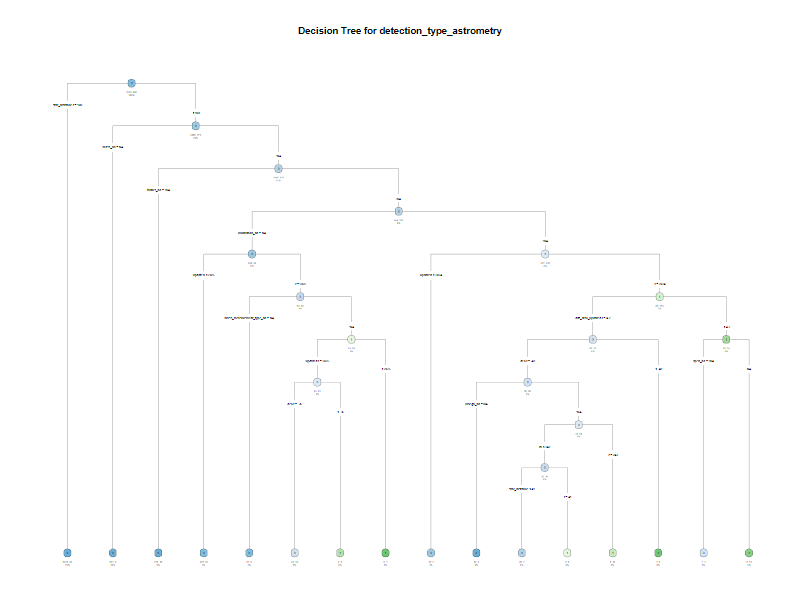

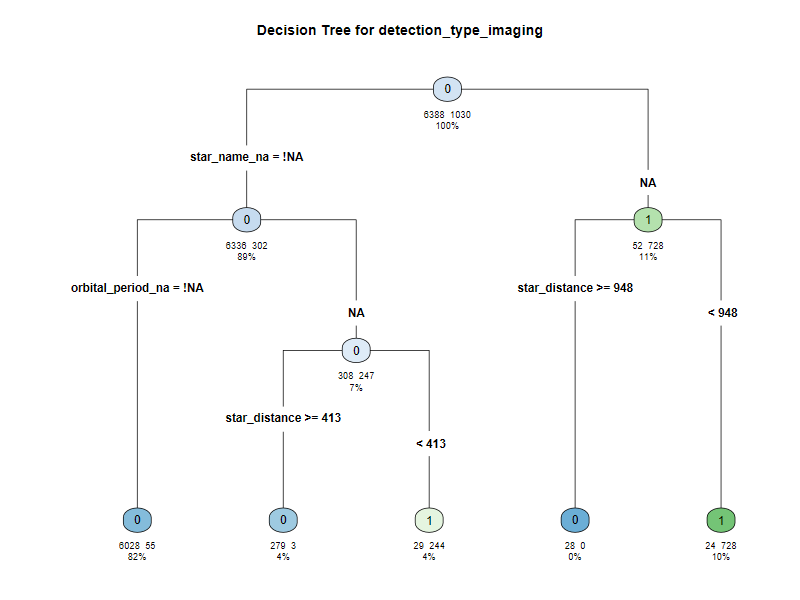

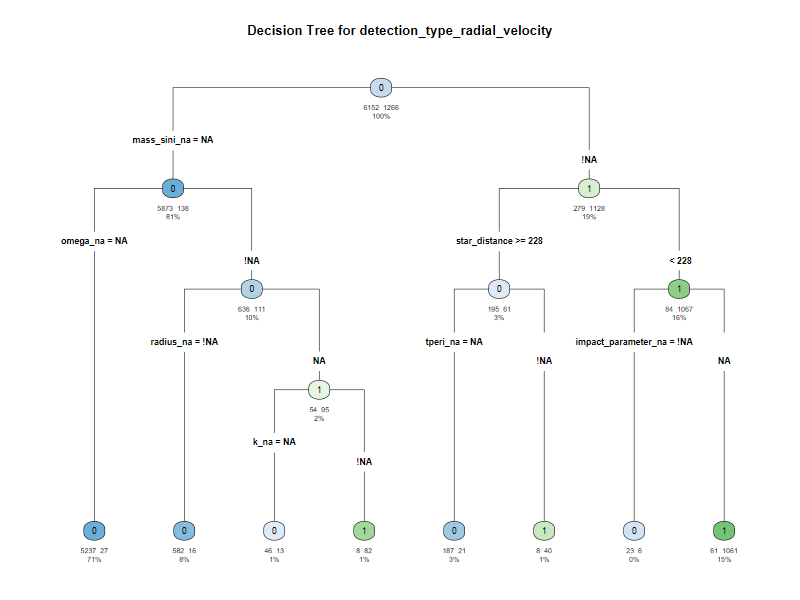

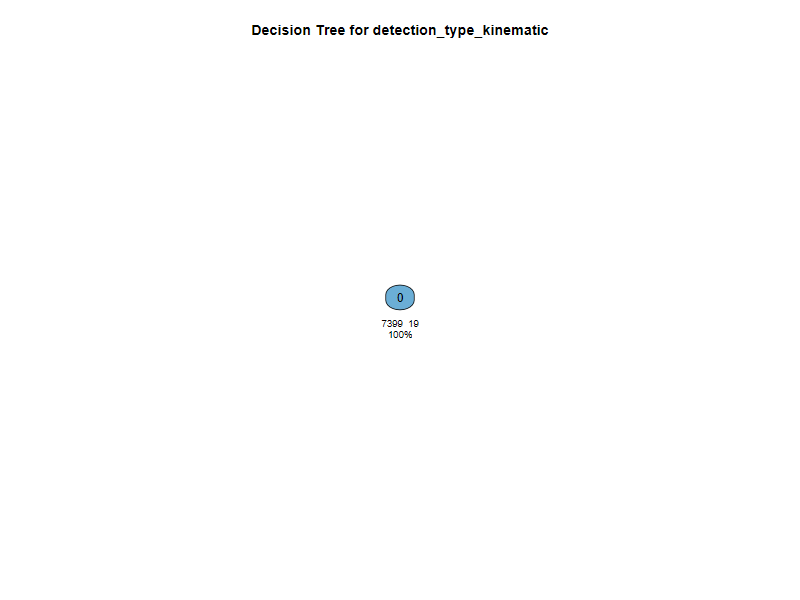

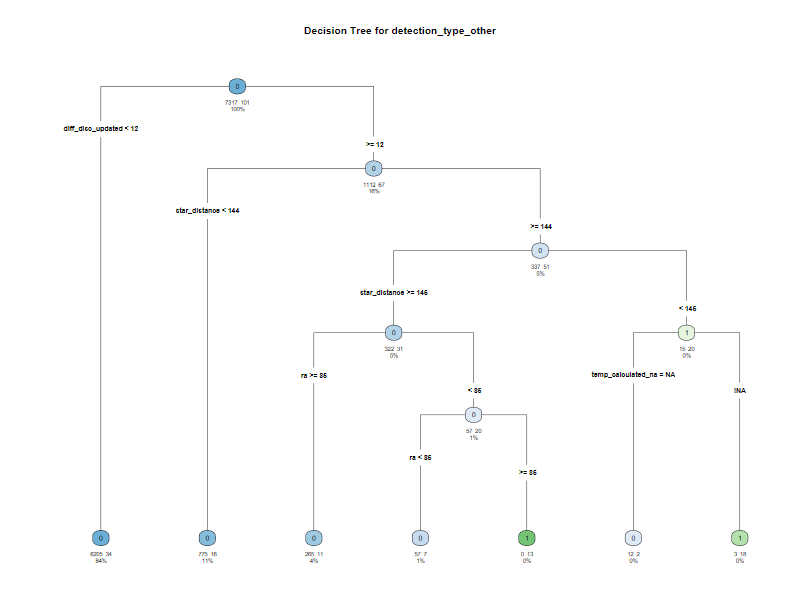

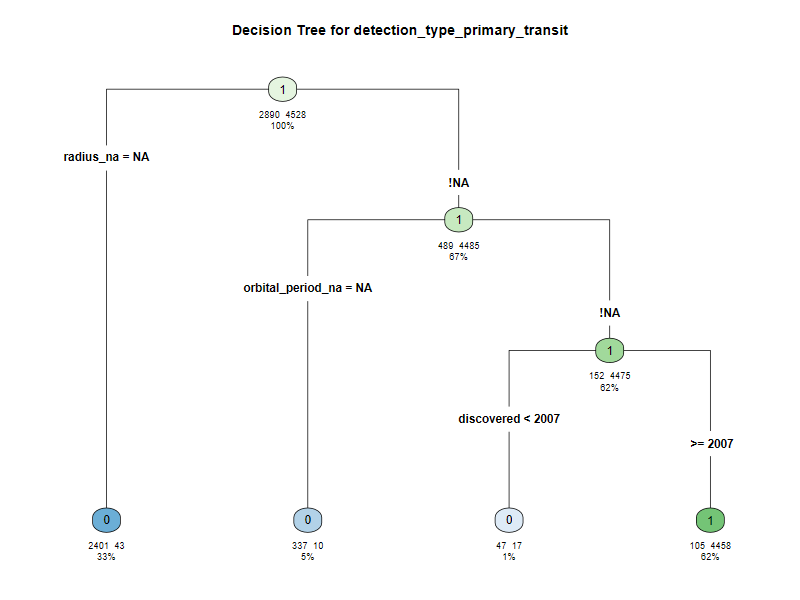

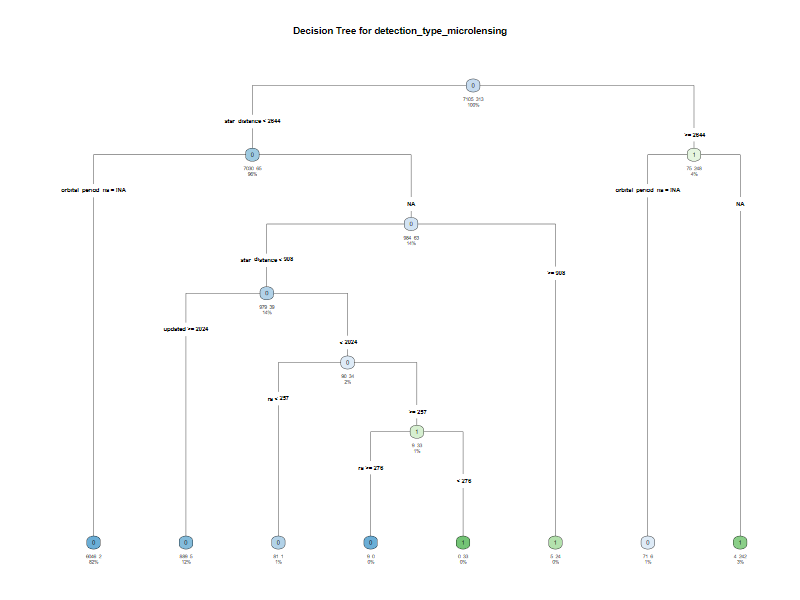

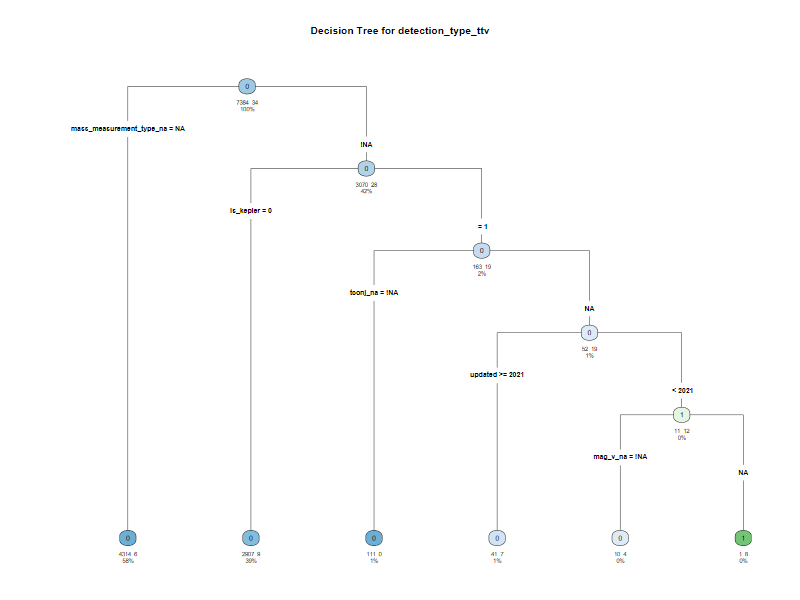

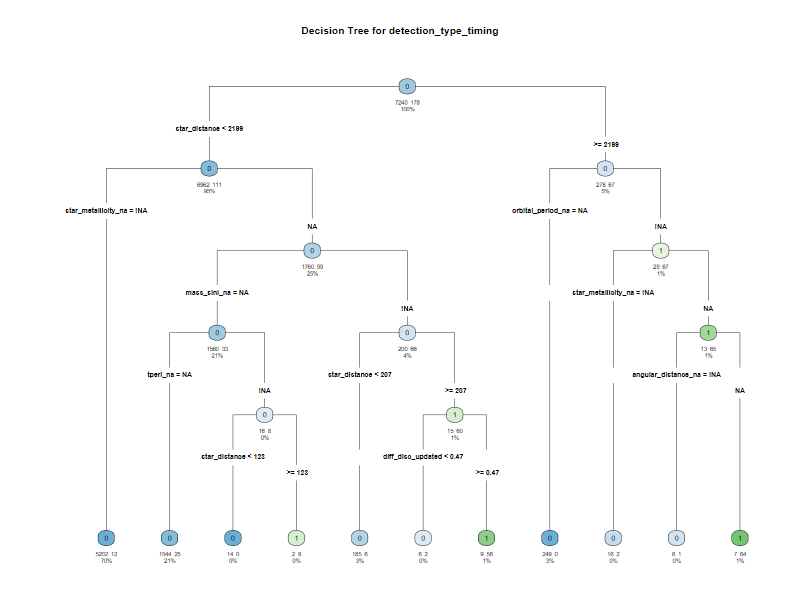

In [36]:
# Load necessary library
library(rpart.plot)

# Plot the decision trees with titles
target_cols %>%
  map2(models, ~ {
    rpart.plot(.y, 
               type = 4, 
               extra = 101, 
               under = TRUE, 
               fallen.leaves = TRUE,
               main = paste("Decision Tree for", .x))  # Title with the target label
  })


In [37]:
# get accuracy
accuracy <- function(y_true, y_pred) {
  result <- list()
  
  for (col in names(y_true)) {
    confusion_matrix <- table(y_true[[col]], y_pred[[paste0("pred_", col)]])
    result[[col]] <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
  }
  
  return(result)
}

accuracy(shadow_exoplanets_with_preds %>% select(starts_with("detection_type_")), predictions %>% select(starts_with("pred_")))

$detection_type_astrometry
[1] 0.9854408

$detection_type_imaging
[1] 0.9850364

$detection_type_radial_velocity
[1] 0.9784308

$detection_type_kinematic
[1] 0.9974387

$detection_type_other
[1] 0.9901591

$detection_type_primary_transit
[1] 0.9764087

$detection_type_microlensing
[1] 0.9968994

$detection_type_ttv
[1] 0.9963602

$detection_type_timing
[1] 0.9911027


In [38]:
set.seed(123)

shadow_exoplanets %>% 
  select(-name, -starts_with("detection_type"), -ends_with("_na"), -discovered, -updated, -diff_disc_updated, -is_kepler) %>% 
  as_shadow() %>% 
  bind_cols(shadow_exoplanets) %>% 
  select(-discovered, -updated, -diff_disc_updated, -is_kepler, -star_distance, -ra, -dec) %>%
  relocate(name, starts_with("detection_type")) -> shadower_exoplanets

shadower_exoplanets %>% glimpse

Rows: 7,418
Columns: 54
$ name                           <chr> "109 Psc b", "112 Psc b", "112 Psc c", …
$ detection_type_astrometry      <fct> 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, …
$ detection_type_imaging         <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, …
$ detection_type_radial_velocity <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, …
$ detection_type_kinematic       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_other           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_primary_transit <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_microlensing    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_ttv             <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ detection_type_timing          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ star_distance_NA               <fct> !NA, !NA, !NA, !NA, !NA, !NA, !NA, !NA,…
$ ra_NA                          <fct> !NA, !NA, !NA, !NA, !NA, !NA, !NA, !NA,…
$ dec_NA        

In [39]:
# Do the same thing with shadower_exoplanets


# Define target and predictor columns
target_cols <- names(shadower_exoplanets) %>% 
  keep(~ startsWith(.x, "detection_type_"))

predictor_cols <- names(shadower_exoplanets) %>%
  setdiff(c("name", target_cols))

# Train decision trees for each target label
models <- target_cols %>%
  set_names() %>%
  map(~ rpart(as.formula(paste(.x, "~", paste(predictor_cols, collapse = " + "))),
              data = shadower_exoplanets, method = "class"))

# Make predictions and add them to the original dataset
shadower_exoplanets_with_preds <- shadower_exoplanets %>%
  bind_cols(models %>%
    map_dfc(~ predict(.x, shadower_exoplanets, type = "class")) %>%
    rename_with(~ paste0("pred_", target_cols))  # Prefix predictions for clarity
  )

predictions <- shadower_exoplanets_with_preds %>%
  mutate(
    actual_combined = apply(select(., all_of(target_cols)), 1, paste, collapse = "_"),
    predicted_combined = apply(select(., starts_with("pred_")), 1, paste, collapse = "_")
  ) %>% select(actual_combined, predicted_combined, starts_with("pred_"), starts_with("detection_type_"))
predictions

# A tibble: 7,418 × 20
   actual_combined   predicted_combined pred_detection_type_astrometry
   <chr>             <chr>              <fct>                         
 1 1_0_1_0_0_0_0_0_0 0_0_1_0_0_1_0_0_0  0                             
 2 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 3 1_0_1_0_0_0_0_0_0 1_0_1_0_0_0_0_0_0  1                             
 4 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 5 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 6 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 7 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 8 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
 9 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
10 0_0_1_0_0_0_0_0_0 0_0_1_0_0_0_0_0_0  0                             
# ℹ 7,408 more rows
# ℹ 17 more variables: pred_detection_type_imaging <fct>,
#   pred_detection_type_radial_velocity <fct>,


In [40]:
# accuracy
accuracy(shadower_exoplanets_with_preds %>% select(starts_with("detection_type_")), predictions %>% select(starts_with("pred_")))

$detection_type_astrometry
[1] 0.9791049

$detection_type_imaging
[1] 0.9766783

$detection_type_radial_velocity
[1] 0.9800485

$detection_type_kinematic
[1] 0.9974387

$detection_type_other
[1] 0.9863845

$detection_type_primary_transit
[1] 0.9723645

$detection_type_microlensing
[1] 0.9912375

$detection_type_ttv
[1] 0.995821

$detection_type_timing
[1] 0.9889458


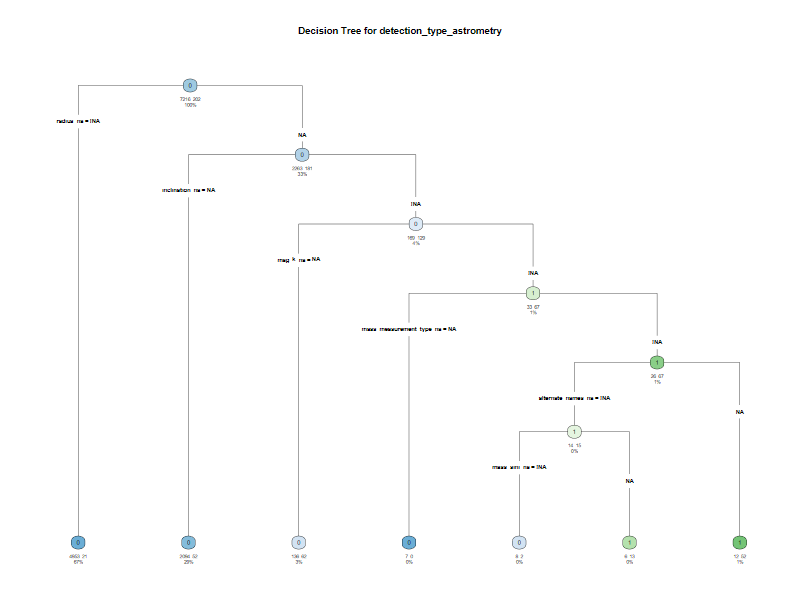

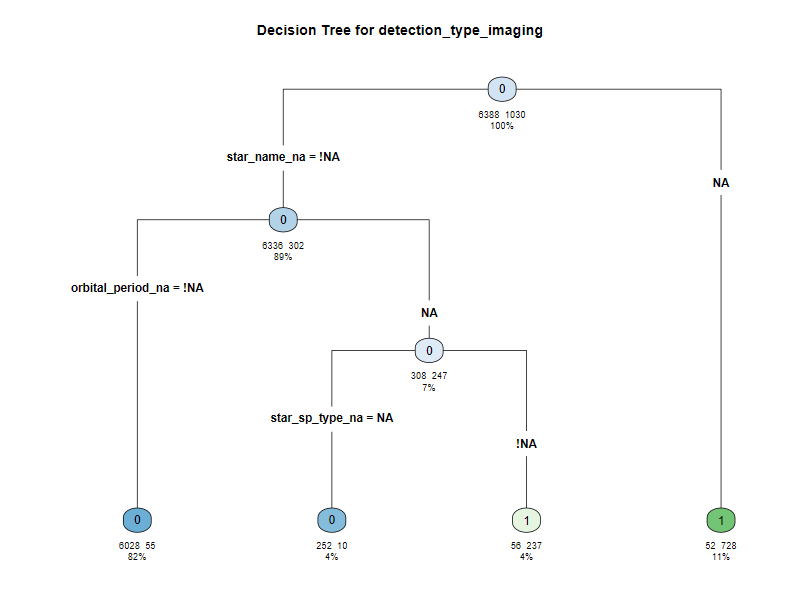

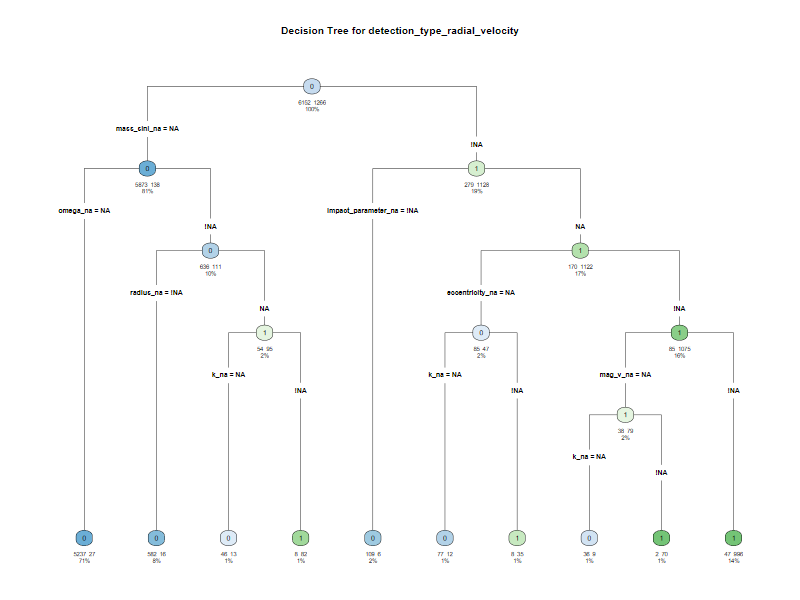

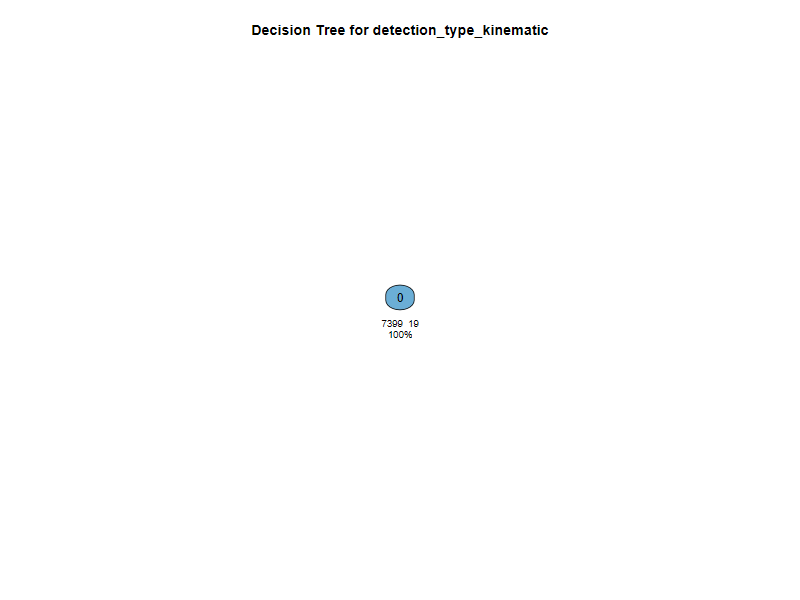

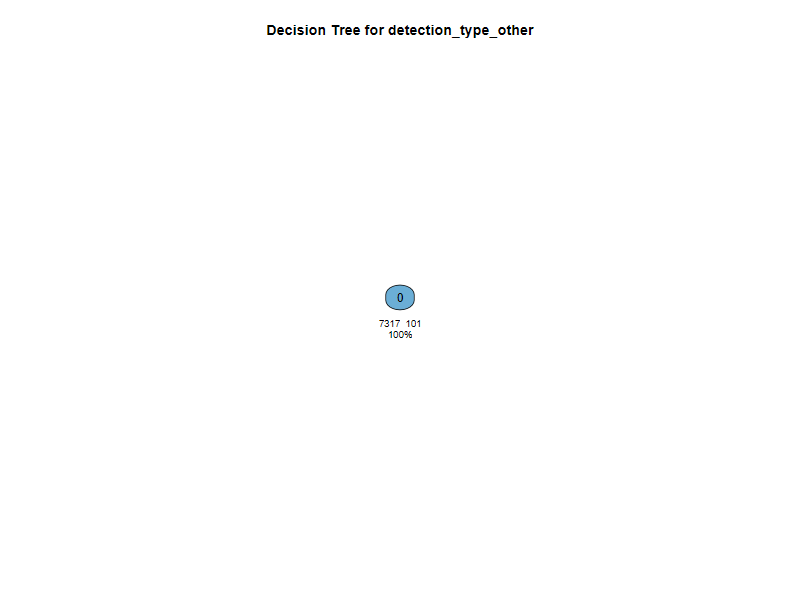

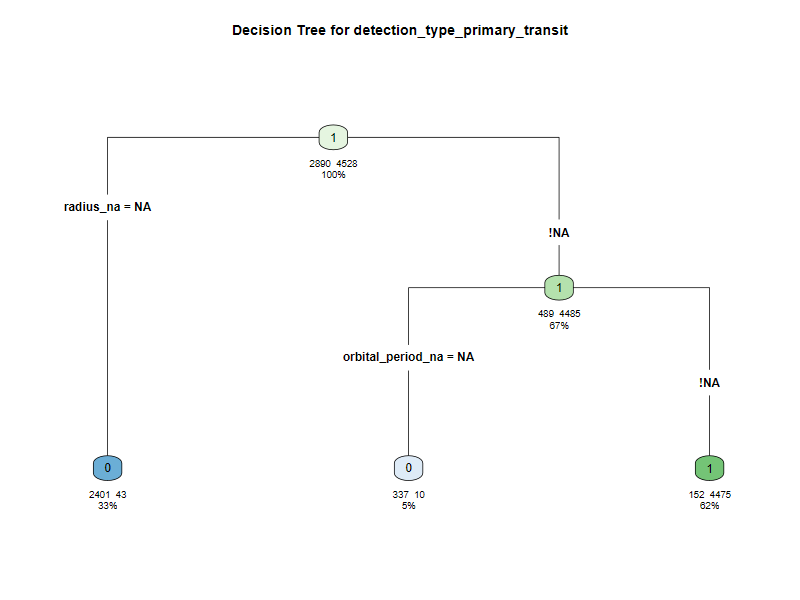

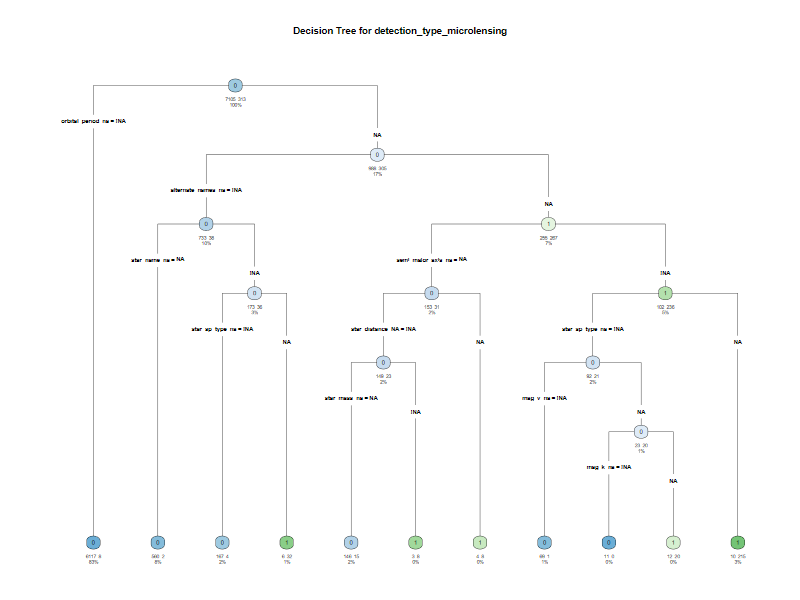

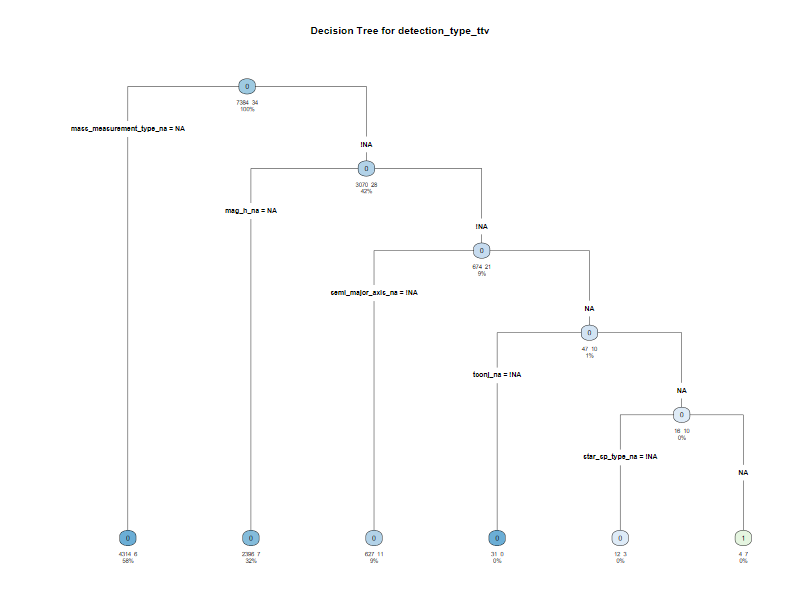

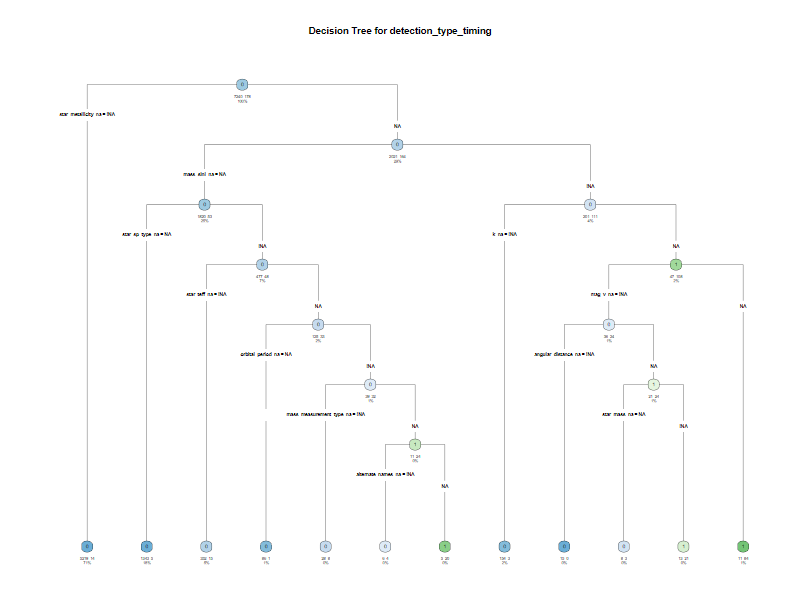

[[1]]
[[1]]$obj
n= 7418 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 7418 202 0 (0.972768940 0.027231060)  
    2) radius_na=!NA 4974  21 0 (0.995778046 0.004221954) *
    3) radius_na=NA 2444 181 0 (0.925941080 0.074058920)  
      6) inclination_na=NA 2146  52 0 (0.975768872 0.024231128) *
      7) inclination_na=!NA 298 129 0 (0.567114094 0.432885906)  
       14) mag_k_na=NA 198  62 0 (0.686868687 0.313131313) *
       15) mag_k_na=!NA 100  33 1 (0.330000000 0.670000000)  
         30) mass_measurement_type_na=NA 7   0 0 (1.000000000 0.000000000) *
         31) mass_measurement_type_na=!NA 93  26 1 (0.279569892 0.720430108)  
           62) alternate_names_na=!NA 29  14 1 (0.482758621 0.517241379)  
            124) mass_sini_na=!NA 10   2 0 (0.800000000 0.200000000) *
            125) mass_sini_na=NA 19   6 1 (0.315789474 0.684210526) *
           63) alternate_names_na=NA 64  12 1 (0.187500000 0.812500000) *

[[1]]$snipped.nodes
NULL

[[1]]$xlim

In [41]:
# plot
target_cols %>%
  map2(models, ~ {
    rpart.plot(.y, 
               type = 4, 
               extra = 101, 
               under = TRUE, 
               fallen.leaves = TRUE,
               main = paste("Decision Tree for", .x))  # Title with the target label
  })